In [44]:
import pandas as pd

# Load datasets
completed_orders = pd.read_csv('data/completed_orders.csv')
delivery_requests = pd.read_csv('data/driver_locations_during_request.csv')
weather = pd.read_csv('data/weather_data.csv')
calendar = pd.read_csv('data/holiday_data.csv')

In [45]:
# Create a new column for the date part of Trip Start Time
completed_orders['Trip Date'] = pd.to_datetime(completed_orders['Trip Start Time']).dt.date

# Merge completed_orders with delivery_requests
data = pd.merge(completed_orders, delivery_requests, left_on='Trip ID', right_on='order_id', how='outer')

# Create a date column in data for merging with weather and calendar
data['Trip Date'] = pd.to_datetime(data['Trip Start Time']).dt.date

# Convert 'date' columns in weather and calendar to datetime
weather['date'] = pd.to_datetime(weather['date']).dt.date
calendar['date'] = pd.to_datetime(calendar['date'], utc=True).dt.date

# Merge with weather data on date
data = pd.merge(data, weather, left_on='Trip Date', right_on='date', how='outer')

# Merge with calendar data on date
data = pd.merge(data, calendar, left_on='Trip Date', right_on='date', how='outer')

# Inspect the merged dataset
data.info()
data.size


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067376 entries, 0 to 2067375
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Trip ID           float64
 1   Trip Origin       object 
 2   Trip Destination  object 
 3   Trip Start Time   object 
 4   Trip End Time     object 
 5   Trip Date         object 
 6   id                float64
 7   order_id          float64
 8   driver_id         float64
 9   driver_action     object 
 10  lat               float64
 11  lng               float64
 12  created_at        float64
 13  updated_at        float64
 14  date_x            object 
 15  temperature       float64
 16  rain              float64
 17  date_y            object 
 18  name              object 
 19  type              object 
dtypes: float64(10), object(10)
memory usage: 331.2+ MB


41347520

In [46]:
# Create features like trip duration, distance travelled etc.
data['Trip Start Time'] = pd.to_datetime(data['Trip Start Time'])
data['Trip End Time'] = pd.to_datetime(data['Trip End Time'])
data['trip_duration'] = (data['Trip End Time'] - data['Trip Start Time']).dt.total_seconds() / 60  # Duration in minutes

data.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip Date,id,order_id,driver_id,driver_action,...,lng,created_at,updated_at,date_x,temperature,rain,date_y,name,type,trip_duration
0,391996.0,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,2021-07-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021-07-01,27.8,0.0,NaN,NaN,NaN,1.550000
1,391997.0,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,2021-07-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021-07-01,27.8,0.0,NaN,NaN,NaN,29.400000
2,391998.0,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,2021-07-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021-07-01,27.8,0.0,NaN,NaN,NaN,41.350000
3,391999.0,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,2021-07-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021-07-01,27.8,0.0,NaN,NaN,NaN,13.583333
4,392001.0,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,2021-07-01,1.0,392001.0,243828.0,accepted,...,3.270465,NaN,NaN,2021-07-01,27.8,0.0,NaN,NaN,NaN,3.616667


In [47]:
from scripts.feature_engineering import extract_features

data = extract_features(df=data)
# Inspect the dataset with new features
print(data.head())

    Trip ID                         Trip Origin  \
0  391996.0  6.508813001668548,3.37740316890347   
1  391997.0                 6.4316714,3.4555375   
2  391998.0         6.631679399999999,3.3388976   
3  391999.0         6.572757200000001,3.3677082   
4  392001.0                 6.6010417,3.2766339   

                  Trip Destination     Trip Start Time       Trip End Time  \
0      6.650969799999999,3.3450307 2021-07-01 07:28:04 2021-07-01 07:29:37   
1  6.4280814653326,3.4721885847586 2021-07-01 06:38:04 2021-07-01 07:07:28   
2      6.508324099999999,3.3590397 2021-07-01 06:21:02 2021-07-01 07:02:23   
3      6.584881099999999,3.3614073 2021-07-01 07:16:07 2021-07-01 07:29:42   
4              6.4501069,3.3916154 2021-07-01 09:30:59 2021-07-01 09:34:36   

    Trip Date   id  order_id  driver_id driver_action  ...  type  \
0  2021-07-01  NaN       NaN        NaN           NaN  ...   NaN   
1  2021-07-01  NaN       NaN        NaN           NaN  ...   NaN   
2  2021-07-01  NaN  

In [2]:
data.to_csv('data/merged_final_dataset.csv', index=False)
# import pandas as pd
# data = pd.read_csv('data/merged_final_dataset.csv')
data.info()

C:\Users\aberh\AppData\Local\Temp\ipykernel_13436\2117885114.py:3: DtypeWarning: Columns (9,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/merged_final_dataset.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067376 entries, 0 to 2067375
Data columns (total 29 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Trip ID               float64
 1   Trip Origin           object 
 2   Trip Destination      object 
 3   Trip Start Time       object 
 4   Trip End Time         object 
 5   Trip Date             object 
 6   id                    float64
 7   order_id              float64
 8   driver_id             float64
 9   driver_action         object 
 10  lat                   float64
 11  lng                   float64
 12  created_at            float64
 13  updated_at            float64
 14  date_x                object 
 15  temperature           float64
 16  rain                  float64
 17  date_y                object 
 18  name                  object 
 19  type                  object 
 20  trip_duration         float64
 21  Trip Origin Lat       float64
 22  Trip Origin Lng       float64
 23  Trip De

In [3]:
import numpy as np

# Encode categorical variables

# Define unfulfilled requests as target variable
data['is_fulfilled'] = np.where(data['driver_action'] == 'accepted', 1, 0)
data['is_holiday'] = np.where(data['type']== np.nan, 0, 1)
# Inspect the merged dataset
print(data.head())

    Trip ID                         Trip Origin  \
0  391996.0  6.508813001668548,3.37740316890347   
1  391997.0                 6.4316714,3.4555375   
2  391998.0         6.631679399999999,3.3388976   
3  391999.0         6.572757200000001,3.3677082   
4  392001.0                 6.6010417,3.2766339   

                  Trip Destination      Trip Start Time        Trip End Time  \
0      6.650969799999999,3.3450307  2021-07-01 07:28:04  2021-07-01 07:29:37   
1  6.4280814653326,3.4721885847586  2021-07-01 06:38:04  2021-07-01 07:07:28   
2      6.508324099999999,3.3590397  2021-07-01 06:21:02  2021-07-01 07:02:23   
3      6.584881099999999,3.3614073  2021-07-01 07:16:07  2021-07-01 07:29:42   
4              6.4501069,3.3916154  2021-07-01 09:30:59  2021-07-01 09:34:36   

    Trip Date   id  order_id  driver_id driver_action  ...  Trip Origin Lat  \
0  2021-07-01  NaN       NaN        NaN           NaN  ...         6.508813   
1  2021-07-01  NaN       NaN        NaN           NaN 

In [4]:
from sklearn.model_selection import train_test_split

# Split data into training (70%) and hold-out set (30%)
train_data, holdout_data = train_test_split(data, test_size=0.3, random_state=42)

print("Training Data Shape:", train_data.shape)
print("Holdout Data Shape:", holdout_data.shape)


Training Data Shape: (1447163, 31)
Holdout Data Shape: (620213, 31)


In [19]:
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.network import BayesianNetwork
import matplotlib.pyplot as plt
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import codecs

# Select features for causal graph
features = ['is_fulfilled','trip_distance', 'temperature', 'speed', 'day_of_week', 'is_weekend', 'rain', 'is_holiday']

# Handle NaN and infinite values in the selected features
train_data_clean = train_data[features].copy()

# Remove rows with NaN or infinite values
train_data_clean = train_data_clean.replace([np.inf, -np.inf], np.nan).dropna()

# Create causal graph
sm = from_pandas(train_data_clean, w_threshold=0.8)

# Visualize the causal graph
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

# Extract the HTML content
html_content = viz.generate_html()

# Save the HTML content with UTF-8 encoding
with codecs.open('causal_graph_full.html', 'w', encoding='utf-8') as file:
    file.write(html_content)

# Open the file in the default web browser
import webbrowser
webbrowser.open('causal_graph_full.html')

True

In [21]:
# Assuming 'sm' is the StructureModel from previous steps
tabu_edges = [
    ("is_weekend", "speed"),
    ("is_weekend", "trip_distance"),
    ("is_holiday", "speed"),
    ("is_holiday", "trip_distance"),
    ("trip_distance", "speed"),
    ("day_of_week", "speed"),
    ("temperature", "speed"),
]

sm_constrained = from_pandas(train_data_clean, tabu_edges=tabu_edges, w_threshold=0.8)

# Visualize the constrained causal graph
viz_constrained = plot_structure(
    sm_constrained,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

# Extract the HTML content for the constrained graph
html_content_constrained = viz_constrained.generate_html()

# Save the HTML content with UTF-8 encoding
with codecs.open('causal_graph_constrained.html', 'w', encoding='utf-8') as file:
    file.write(html_content_constrained)

# Open the file in the default web browser
webbrowser.open('causal_graph_constrained.html')

True

In [22]:

# Convert to Bayesian Network for further analysis
bn = BayesianNetwork(sm_constrained)

# Display learned structure
sm.edges()

OutEdgeView([('is_fulfilled', 'trip_distance'), ('is_fulfilled', 'speed'), ('trip_distance', 'speed'), ('temperature', 'speed'), ('day_of_week', 'speed'), ('day_of_week', 'rain'), ('is_weekend', 'trip_distance'), ('is_weekend', 'speed'), ('is_weekend', 'day_of_week'), ('is_weekend', 'rain'), ('is_weekend', 'is_holiday'), ('is_holiday', 'temperature'), ('is_holiday', 'speed'), ('is_holiday', 'day_of_week'), ('is_holiday', 'rain')])

Fraction: 0.1, Jaccard Index: 0.8125
Fraction: 0.2, Jaccard Index: 0.8125
Fraction: 0.3, Jaccard Index: 0.8125
Fraction: 0.4, Jaccard Index: 0.8125
Fraction: 0.5, Jaccard Index: 0.8750
Fraction: 0.6, Jaccard Index: 0.7778
Fraction: 0.7, Jaccard Index: 0.8125
Fraction: 0.8, Jaccard Index: 0.8750
Fraction: 0.9, Jaccard Index: 0.7778
Graph stabilizes at: 0.2


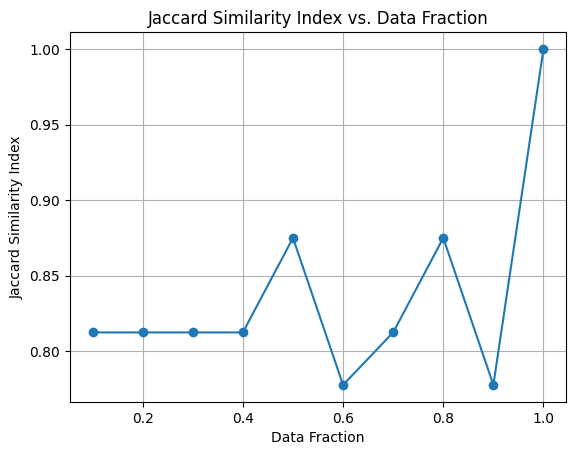

In [23]:
import numpy as np
from causalnex.structure.notears import from_pandas
from sklearn.model_selection import train_test_split
import networkx as nx

# Function to calculate Jaccard Similarity Index
def jaccard_similarity(graph1, graph2):
    edges1 = set(graph1.edges())
    edges2 = set(graph2.edges())
    intersection = len(edges1 & edges2)
    union = len(edges1 | edges2)
    return intersection / union

# Create causal graph with full training data
full_graph = from_pandas(train_data_clean[features], w_threshold=0.8, max_iter=100)

# Initialize lists to store fractions and Jaccard indices
fractions = np.arange(0.1, 1.0, 0.1)  # Avoid using 1.0 to prevent error
jaccard_indices = []

# Incrementally create causal graphs
for fraction in fractions:
    subset_data, _ = train_test_split(train_data_clean, train_size=fraction, random_state=42)
    try:
        subset_graph = from_pandas(subset_data[features], w_threshold=0.8, max_iter=100)
        jaccard_index = jaccard_similarity(full_graph, subset_graph)
        jaccard_indices.append(jaccard_index)
        print(f"Fraction: {fraction:.1f}, Jaccard Index: {jaccard_index:.4f}")
    except Exception as e:
        print(f"Fraction: {fraction:.1f}, Error: {str(e)}")
        jaccard_indices.append(np.nan)

# Add Jaccard Index for the full data
jaccard_indices.append(1.0)

# Determine at which point the graph stabilizes
stable_fraction = fractions[np.argmax(np.diff(jaccard_indices, prepend=np.nan) < 0.01)]  # Fraction where the graph stabilizes
print(f"Graph stabilizes at: {stable_fraction:.1f}")

# Plot Jaccard Similarity Index vs. Data Fraction
import matplotlib.pyplot as plt

plt.plot(np.append(fractions, 1.0), jaccard_indices, marker='o')
plt.xlabel('Data Fraction')
plt.ylabel('Jaccard Similarity Index')
plt.title('Jaccard Similarity Index vs. Data Fraction')
plt.grid(True)
plt.show()

In [33]:
# Create the stable causal graph
stable_data, _ = train_test_split(train_data_clean, train_size=stable_fraction, random_state=42)
stable_graph = from_pandas(stable_data[features], w_threshold=0.8)

# Convert to Bayesian Network
bn = BayesianNetwork(stable_graph)

# Select direct causes of the target variable 'unfulfilled_request'
is_fulfilled = list(stable_graph.predecessors('is_fulfilled'))
print(f"Direct causes of 'is_fulfilled': {is_fulfilled}")


Direct causes of 'is_fulfilled': []


In [39]:
from causalnex.network import BayesianNetwork
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import matplotlib.pyplot as plt
from causalnex.inference import InferenceEngine

# Function to fit CPDs to the Bayesian Network
def fit_cpds(bn, data, method="BayesianEstimator"):
    from causalnex.network import BayesianNetwork
    bn = BayesianNetwork(bn)
    bn.fit_node_states_and_cpds(data, method=method, bayes_prior='K2')
    return bn

# Fit the CPDs to the Bayesian Network
bn = fit_cpds(stable_graph, stable_data[features])

# Initialize inference engine
ie = InferenceEngine(bn)

# Function to perform interventions and predict unfulfilled requests
def predict_unfulfilled_requests(intervention, evidence=None):
    ie.do_intervention(intervention)
    if evidence:
        ie.update_beliefs(evidence)
    prediction = ie.query()["is_fulfilled "]
    ie.reset_do(intervention.keys())
    return prediction

print(ie.query()['trip_distance'])
# Business Questions:
# 1. Given drivers are recommended to move 1km every 30 mins in a selected direction, what happens to the number of unfulfilled requests?
intervention_1 = {'trip_distance': ie.query()['trip_distance'].mean() + 1}  # Assuming this is how we model the 1km movement
prediction_1 = predict_unfulfilled_requests(intervention_1)
print(f"Predicted unfulfilled requests after intervention 1: {prediction_1}")

# 2. If we assume we know the location of the next 20% of orders within 5km accuracy, what happens to the number of unfulfilled requests?
intervention_2 = {'trip_distance': ie.query()['trip_distance'].mean() + 5}  # Assuming 5km accuracy
prediction_2 = predict_unfulfilled_requests(intervention_2)
print(f"Predicted unfulfilled requests after intervention 2: {prediction_2}")

# 3. Had we changed the time requirements to drivers operating time in the past, what fractions of orders could have been completed?
# Assuming 'trip_duration' reflects operating time; we intervene on 'trip_duration'
intervention_3 = {'trip_duration': ie.query()['trip_duration'].mean() * 1.1}  # Example: increasing operating time by 10%
prediction_3 = predict_unfulfilled_requests(intervention_3)
print(f"Predicted unfulfilled requests after intervention 3: {prediction_3}")

# 4. If I increased the number of drivers by 10% cumulative per month, what fraction of orders can be completed?
# Assuming the number of drivers impacts 'trip_duration' and 'trip_distance'
intervention_4 = {'trip_duration': ie.query()['trip_duration'].mean() * 0.9, 'trip_distance': ie.query()['trip_distance'].mean() * 1.1}
prediction_4 = predict_unfulfilled_requests(intervention_4)
print(f"Predicted unfulfilled requests after intervention 4: {prediction_4}")


MemoryError: Unable to allocate 871. GiB for an array with shape (93478, 2500400) and data type int32

In [35]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train-test split
X_train = train_data_clean[features]
y_train = train_data_clean['is_fulfilled']
X_test = holdout_data[features]
y_test = holdout_data['is_fulfilled']

# Train models using all features
xgb_model_all = XGBRegressor()
rf_model_all = RandomForestRegressor()

xgb_model_all.fit(X_train, y_train)
rf_model_all.fit(X_train, y_train)

# Evaluate models using all features
xgb_predictions_all = xgb_model_all.predict(X_test)
rf_predictions_all = rf_model_all.predict(X_test)

xgb_rmse_all = mean_squared_error(y_test, xgb_predictions_all)
rf_rmse_all = mean_squared_error(y_test, rf_predictions_all)
xgb_r2_all = r2_score(y_test, xgb_predictions_all)
rf_r2_all = r2_score(y_test, rf_predictions_all)

print(f"XGBoost RMSE (all features): {xgb_rmse_all:.4f}, R2: {xgb_r2_all:.4f}")
print(f"Random Forest RMSE (all features): {rf_rmse_all:.4f}, R2: {rf_r2_all:.4f}")

# Train models using selected features
selected_features = features
X_train_selected = train_data_clean[selected_features]
X_test_selected = holdout_data[selected_features]

xgb_model_selected = XGBRegressor()
rf_model_selected = RandomForestRegressor()

xgb_model_selected.fit(X_train_selected, y_train)
rf_model_selected.fit(X_train_selected, y_train)

# Evaluate models using selected features
xgb_predictions_selected = xgb_model_selected.predict(X_test_selected)
rf_predictions_selected = rf_model_selected.predict(X_test_selected)

xgb_rmse_selected = mean_squared_error(y_test, xgb_predictions_selected)
rf_rmse_selected = mean_squared_error(y_test, rf_predictions_selected)
xgb_r2_selected = r2_score(y_test, xgb_predictions_selected)
rf_r2_selected = r2_score(y_test, rf_predictions_selected)

print(f"XGBoost RMSE (selected features): {xgb_rmse_selected:.4f}, R2: {xgb_r2_selected:.4f}")
print(f"Random Forest RMSE (selected features): {rf_rmse_selected:.4f}, R2: {rf_r2_selected:.4f}")

XGBoost RMSE (all features): 0.0000, R2: 1.0000
Random Forest RMSE (all features): 0.0000, R2: 1.0000
XGBoost RMSE (selected features): 0.0000, R2: 1.0000
Random Forest RMSE (selected features): 0.0000, R2: 1.0000
